## Chapter 11: Machine Learning


What is machine learning? It's a broad topic, but **in this chapter, we start with SUPERVISED machine learning means the following problem/task:**

### ***predict/estimate/guess something*** 
(e.g. house price, or whether an image a dog or cat, breed of a dog) 
### ***given some input information*** (e.g zip codes and sq. footage, or matrix of RGB values)

**Supervised** machine learning is where the target quantity has been told to us, and in building the algorithm/model, we are given data with the correct target values, i.e. correct answers.



### terminology:
- **target** - what we want to predict
- **features** or **predictors** - the input information/data

(Why is the input data called features? Often, input is features/properties of an object to predict something about an object. E.g. using features of a house, like zip code, sq. footage, etc., task is to predict its price)

Two general broad categories of ML tasks:
### Regression vs classification tasks
- **regression** target (the thing you want to predict/estimate) has a *continuous* range of values (e.g. house price)
- **classification** target has a *discrete* set of values or categories (e.g. dog vs cat, handwritten digit classification - 0, 1, 2, ..., 9)



---

### Examples of **regression** tasks, courtesy of ChatGPT

**Prompt to ChatGPT**
Give 10 examples of regression tasks (in machine learning)

**ChatGPT**
Certainly! Regression is a type of machine learning task where the goal is to predict a continuous value based on input data. Here are ten examples of regression tasks:

1. **House Price Prediction:** Predict the price of a house based on features like square footage, number of bedrooms, location, and other relevant factors.

2. **Stock Price Forecasting:** Predict the future price of a stock based on historical price data, trading volume, and other financial indicators.

3. **Temperature Prediction:** Predict the temperature for a specific location and time based on historical weather data and other atmospheric factors.

4. **Demand Forecasting:** Predict future demand for a product or service based on historical sales data, marketing efforts, and external factors.

5. **Energy Consumption Prediction:** Predict the amount of energy a household or industrial facility will consume based on historical usage, time of day, and weather conditions.

6. **Healthcare Outcome Prediction:** Predict health outcomes like patient recovery time, length of hospital stay, or disease progression based on patient data and medical history.

7. **Crop Yield Prediction:** Predict the yield of crops based on factors such as weather conditions, soil quality, and agricultural practices.

8. **Air Quality Prediction:** Predict air quality levels for specific locations based on pollution sources, meteorological conditions, and historical data.

9. **Traffic Flow Prediction:** Predict traffic congestion and flow patterns based on historical traffic data, events, and road conditions.

10. **Salary Prediction:** Predict a person's salary based on factors like education level, years of experience, job role, and industry.

These examples showcase the variety of regression tasks across different domains where machine learning is used to make continuous value predictions, allowing for better decision-making and insights.

---

### Examples of **classification** tasks, courtesy of ChatGPT

**Prompt to ChatGPT**
Give 10 examples of classification tasks (in machine learning)

**ChatGPT**
Certainly! Classification is a common type of machine learning task where the goal is to categorize input data into predefined classes or categories. Here are five examples of classification tasks:

1. **Email Spam Detection:** Given a set of emails, classify each email as either "spam" or "not spam" based on its content and features.

2. **Image Recognition:** Classify images of objects, animals, or scenes into different categories. For instance, recognizing whether an image contains a cat or a dog. Or very famous the MNIST handwritten digit classification.

3. **Sentiment Analysis:** Determine the sentiment expressed in a piece of text, such as classifying a movie review as "positive," "negative," or "neutral."

4. **Disease Diagnosis:** Classify medical images or patient data to diagnose whether a person has a specific disease, such as detecting whether an X-ray image indicates pneumonia.

5. **Customer Churn Prediction:** Predict whether a customer is likely to leave a service or subscription, based on their past behavior, usage patterns, and demographic information.
Certainly! Here are five more examples of classification tasks in machine learning:

1. **Handwriting Recognition:** Classify handwritten characters or digits into their respective classes, often used in applications like automated postal code reading or digit recognition in checks.

2. **Credit Scoring:** Classify loan applications into "approved" or "rejected" categories based on various features such as income, credit history, and debt-to-income ratio.

3. **Species Identification:** Classify species of plants or animals based on features such as physical characteristics, habitat, and behavior. This can be used in ecological studies and conservation efforts.

4. **Fraud Detection:** Classify transactions as "legitimate" or "fraudulent" based on transaction history, location, amount, and other relevant factors to prevent unauthorized transactions.

5. **Language Identification:** Determine the language of a given text or audio snippet, useful for automatically routing multilingual customer service requests or organizing multilingual documents.

These examples highlight the diversity of classification tasks across various domains, showcasing how machine learning can be applied to solve real-world problems.

---
## Shift from computer science to data science 

Typical computer science algorithms provide a solution to a problem that is correct 100% of the time (e.g. sort the list, find the smallest elements, etc.). In machine learning

### 1. Shift from deterministic to statistical thinking since no there are exact formulas:
There is generally no (useable) exact formula that yields the target value, given the features (input data). e.g. there is no formula for exact house price given features like zip code, sq. ft, number of bed/bath - there is just some correlation, and machine learning tries to uncover the strength of correlation between targets and features.

### 2. Don't let perfect be the enemy of good 
The predicted value should be close enough (in regression tasks) or usually correct (in classification tasks) to the target value, but we are ok with being wrong (a small number of times), e.g. some cats may get classified as dogs.

### 3. Caution: 
In use cases where being wrong just once can be catastrophic, (e.g. self-driving cars, disease detection, ...) machine learning should be used with caution, and output should have some human oversight (e.g. human driver needs to be ready to disengage autopilot, or a doctor needs to double check)

## Linear regression

An old but still useful technique that is basically find the line (or higher dimensional analogues ) of best fit through data points

**Equation of a line**:
$$y =mx+b$$

Data is a bunch of pairs 
$(x, y)=(x_i, y_i)$
linear regression (also called least squares regression) is finding value of $m$ and $b$ that best fits the data


**Equation of higher dimension analog of a line**

$$Y = AX + b$$ 

where $X, Y, b$ are vectors (list of numbers instead of a single number) and $A$ is a matrix, and $AX$ is matrix-vector multiplication as covered in a linear algebra course.


I will follow

### Exercise 148 (p.446 of *The Python Workshop* text):
'using linear regression to predict the accuracy of the median values of our dataset'


In [53]:
import pandas as pd
import numpy as np


### step 1: Get Data

Get Housing Dataset from book's GitHub webpage

https://github.com/PacktPublishing/The-Python-Workshop-Second-Edition

In [130]:
# get data from book's GitHub page
!wget 'https://raw.githubusercontent.com/PacktPublishing/The-Python-Workshop-Second-Edition/main/Datasets/HousingData.csv'

--2023-08-07 16:36:11--  https://raw.githubusercontent.com/PacktPublishing/The-Python-Workshop-Second-Edition/main/Datasets/HousingData.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8003::154, 2606:50c0:8000::154, 2606:50c0:8001::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8003::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41010 (40K) [text/plain]
Saving to: ‘HousingData.csv’

HousingData.csv     100%[===================>]  40.05K  --.-KB/s    in 0.01s   

2023-08-07 16:36:12 (3.53 MB/s) - ‘HousingData.csv’ saved [41010/41010]



In [131]:
!ls

2521_Syllabus.md                chapter3notes.ipynb
Exercise112.py                  chapter3notes_day2.ipynb
Exercise148-153,160.ipynb       chapter4notes.ipynb
HousingData.csv                 chapter5notes.ipynb
PythonNotesForProfessionals.pdf chapter5notes_day2.ipynb
README.md                       chapter7notes.ipynb
__pycache__                     chapter8notes.ipynb
chapter10notes.ipynb            database.json
chapter10notes_day2.ipynb       misc_resource_files
chapter11notes.ipynb            my_figure.pdf
chapter1notes.ipynb             my_filename
chapter2notes.ipynb             text-to-image.ipynb


### Step 2: Clean up data: drop missing values, remove outliers

Drop missing values or (NaNs), maybe drop outliers (e.g. data that is outside of say 3 standard deviations from the mean)

In [69]:
housing_df=pd.read_csv('HousingData.csv')
housing_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [132]:
# drop null values
housing_df.dropna(inplace=True)

In [133]:
housing_df.head(10)  #notice row 6 has been dropped, it used to contain an NaN

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
10,0.22489,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
11,0.11747,12.5,7.87,0.0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9
12,0.09378,12.5,7.87,0.0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7


### Step 3 Explore the data

Come up with a question. Iterate! Meaning, start with an simple question (e.g. does the median value `MEDV` depend on `CRIM`, the per capita crime rate). Come back to this step repeatedly and refine or change your question depending on what you find.

Text(0, 0.5, 'Median Value')

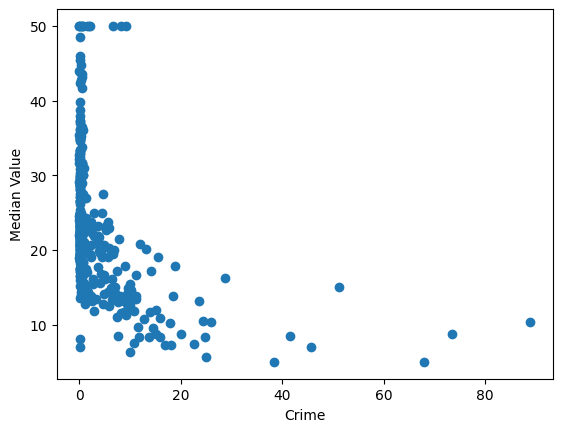

In [134]:
crime=housing_df['CRIM']
medv=housing_df['MEDV']

import matplotlib.pyplot as plt
plt.scatter(crime, medv)
plt.xlabel('Crime')
plt.ylabel('Median Value')

We didn't remove outliers! Let's do that now

In [135]:
crime.describe()

count    394.000000
mean       3.690136
std        9.202423
min        0.006320
25%        0.081955
50%        0.268880
75%        3.435973
max       88.976200
Name: CRIM, dtype: float64

(array([258.,  21.,  11.,   6.,  12.,   9.,   6.,   8.,   5.,   6.,   7.,
          7.,   4.,   3.,   2.,   3.,   2.,   4.,   1.,   0.,   3.,   1.,
          1.,   0.,   0.,   1.,   1.,   2.,   1.,   1.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([6.32000000e-03, 8.96018800e-01, 1.78571760e+00, 2.67541640e+00,
        3.56511520e+00, 4.45481400e+00, 5.34451280e+00, 6.23421160e+00,
        7.12391040e+00, 8.01360920e+00, 8.90330800e+00, 9.79300680e+00,
        1.06827056e+01, 1.15724044e+01, 1.24621032e+01, 1.33518020e+01,
        1.42415008e+01, 1.5131

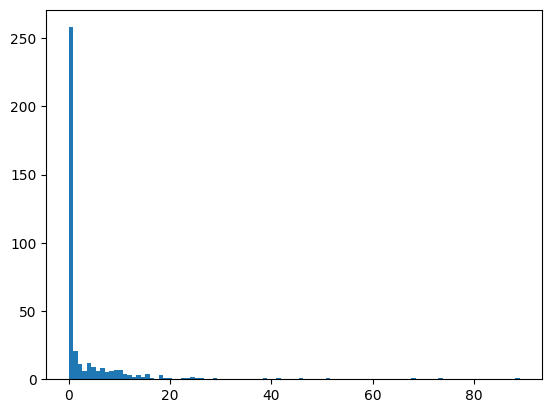

In [137]:
plt.hist(crime, bins=100)

In [139]:
crime

0      0.00632
1      0.02731
2      0.02729
3      0.03237
5      0.02985
        ...   
499    0.17783
500    0.22438
502    0.04527
503    0.06076
504    0.10959
Name: CRIM, Length: 394, dtype: float64

In [138]:
mask1=crime>0.08  #25 % cutoff based on .describe()
mask1

0      False
1      False
2      False
3      False
5      False
       ...  
499     True
500     True
502    False
503    False
504     True
Name: CRIM, Length: 394, dtype: bool

In [141]:
crime[mask1]

7      0.14455
8      0.21124
10     0.22489
11     0.11747
12     0.09378
        ...   
497    0.26838
498    0.23912
499    0.17783
500    0.22438
504    0.10959
Name: CRIM, Length: 297, dtype: float64

In [142]:
crime[ crime>0.08   ]

7      0.14455
8      0.21124
10     0.22489
11     0.11747
12     0.09378
        ...   
497    0.26838
498    0.23912
499    0.17783
500    0.22438
504    0.10959
Name: CRIM, Length: 297, dtype: float64

In [64]:
mask2=crime<3.43
mask2

0      True
1      True
2      True
3      True
5      True
       ... 
499    True
500    True
502    True
503    True
504    True
Name: CRIM, Length: 394, dtype: bool

In [143]:
mask1 and mask2  #doesn't work

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [65]:
mask1 & mask2  #use '&' operator not the word 'and'

0      False
1      False
2      False
3      False
5      False
       ...  
499     True
500     True
502    False
503    False
504     True
Name: CRIM, Length: 394, dtype: bool

In [145]:
housing_df[(housing_df['CRIM']>0.08) & (housing_df['CRIM']<3.43) ]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
10,0.22489,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
11,0.11747,12.5,7.87,0.0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9
12,0.09378,12.5,7.87,0.0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,0.26838,0.0,9.69,0.0,0.585,5.794,70.6,2.8927,6,391,19.2,396.90,14.10,18.3
498,0.23912,0.0,9.69,0.0,0.585,6.019,65.3,2.4091,6,391,19.2,396.90,12.92,21.2
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8


In [72]:
housing_df_norm_crime=housing_df[mask1 & mask2]
housing_df_norm_crime.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,0.567599,5.361111,10.520758,0.080808,0.539924,6.262424,70.090909,3.768080,5.060606,338.782828,18.260606,376.895859,12.178788,23.131818
std,0.681939,10.549600,6.374985,0.273231,0.096755,0.686542,27.506433,1.767869,2.406920,93.469441,2.341734,44.514578,6.242537,8.135992
min,0.080140,0.000000,2.460000,0.000000,0.409000,4.903000,2.900000,1.321600,1.000000,188.000000,13.000000,70.800000,1.730000,7.000000
25%,0.136687,0.000000,6.200000,0.000000,0.470000,5.851750,49.025000,2.347850,4.000000,284.750000,17.400000,378.275000,7.402500,18.625000
50%,0.266005,0.000000,8.140000,0.000000,0.535000,6.110500,79.800000,3.594900,5.000000,307.000000,18.600000,391.520000,11.420000,21.400000
75%,0.661795,0.000000,11.650000,0.000000,0.585000,6.493000,93.950000,4.560125,5.000000,398.000000,20.100000,396.295000,15.510000,24.675000
max,3.321050,45.000000,27.740000,1.000000,0.871000,8.725000,100.000000,8.906700,24.000000,711.000000,21.200000,396.900000,34.410000,50.000000


Text(0, 0.5, 'Median Value')

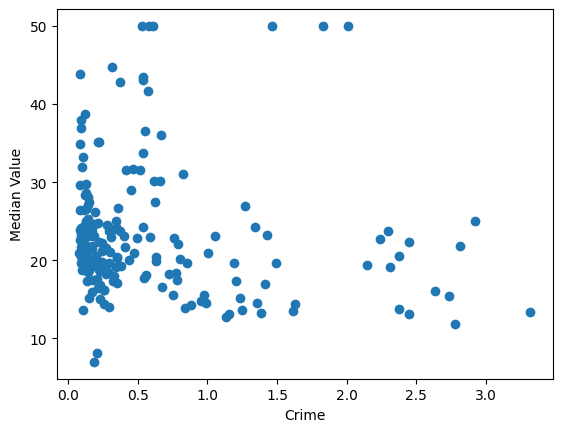

In [146]:

# Don't forget to redefine crime and medv using our new
crime=housing_df_norm_crime['CRIM']
medv=housing_df_norm_crime['MEDV']

import matplotlib.pyplot as plt
plt.scatter(crime, medv)
plt.xlabel('Crime')
plt.ylabel('Median Value')

### There does not seem to be any relationship in the dataset between crime and median value.

**Ok, back to Step 3 (come up with a question)**

### Conclusion: Data Science is as much an art as it a science. It involves exploring a data and then making a story (which others may challenge so you should too before they do) explaining the data


Let's find what feature is **correlated** the most with `MEDV`, using `<dataframe>.corr()`

In [95]:
housing_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.188075,0.391552,-0.051970,0.416160,-0.227170,0.341311,-0.365052,0.608667,0.560841,0.265428,-0.386254,0.461906,-0.397230
ZN,-0.188075,1.000000,-0.521256,-0.033357,-0.515660,0.343210,-0.568174,0.645359,-0.298773,-0.305768,-0.422164,0.169894,-0.415041,0.406822
INDUS,0.391552,-0.521256,1.000000,0.049820,0.762737,-0.403068,0.642387,-0.696569,0.591944,0.734204,0.395691,-0.344788,0.598156,-0.510829
CHAS,-0.051970,-0.033357,0.049820,1.000000,0.076661,0.095308,0.072644,-0.095037,0.014102,-0.026513,-0.104995,0.068913,-0.037113,0.173701
NOX,0.416160,-0.515660,0.762737,0.076661,1.000000,-0.316563,0.732540,-0.768137,0.628170,0.679824,0.210216,-0.384257,0.593655,-0.459054
RM,-0.227170,0.343210,-0.403068,0.095308,-0.316563,1.000000,-0.248670,0.218713,-0.236057,-0.320561,-0.390686,0.123320,-0.636226,0.723951
AGE,0.341311,-0.568174,0.642387,0.072644,0.732540,-0.248670,1.000000,-0.753547,0.443585,0.504472,0.264968,-0.281990,0.601137,-0.407470
DIS,-0.365052,0.645359,-0.696569,-0.095037,-0.768137,0.218713,-0.753547,1.000000,-0.477075,-0.529603,-0.228840,0.285168,-0.505036,0.279547
RAD,0.608667,-0.298773,0.591944,0.014102,0.628170,-0.236057,0.443585,-0.477075,1.000000,0.900000,0.441949,-0.444135,0.510868,-0.416638
TAX,0.560841,-0.305768,0.734204,-0.026513,0.679824,-0.320561,0.504472,-0.529603,0.900000,1.000000,0.446961,-0.435457,0.572218,-0.508864


In [98]:
housing_df.corr()['MEDV'] #isolate the median value column, then sort

CRIM      -0.397230
ZN         0.406822
INDUS     -0.510829
CHAS       0.173701
NOX       -0.459054
RM         0.723951
AGE       -0.407470
DIS        0.279547
RAD       -0.416638
TAX       -0.508864
PTRATIO   -0.543809
B          0.347256
LSTAT     -0.743450
MEDV       1.000000
Name: MEDV, dtype: float64

In [99]:
housing_df.corr()['MEDV'].sort_values()

LSTAT     -0.743450
PTRATIO   -0.543809
INDUS     -0.510829
TAX       -0.508864
NOX       -0.459054
RAD       -0.416638
AGE       -0.407470
CRIM      -0.397230
CHAS       0.173701
DIS        0.279547
B          0.347256
ZN         0.406822
RM         0.723951
MEDV       1.000000
Name: MEDV, dtype: float64

`LSTAT` is percentage of lower status of the population, and that is most negatively correlated with `MEDV`, which makes sense

`RM` is number of rooms, and that is most positively correlated with `MEDV`, which also seems reasonable


We can also visualize the full table of correlations using a heat map and the `seaborn` Python library

In [100]:
!pip install seaborn

<Axes: >

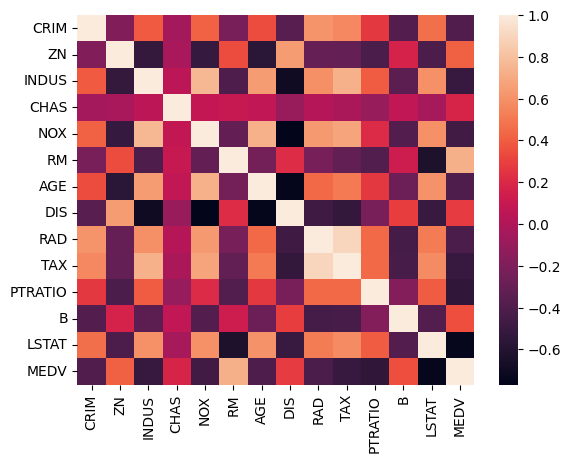

In [101]:
import seaborn as sns

corr=housing_df.corr()
sns.heatmap(corr)

In [147]:
housing_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [76]:
rooms=housing_df['RM']
medv=housing_df['MEDV']
rooms.describe()


count    394.000000
mean       6.280015
std        0.697985
min        3.561000
25%        5.879250
50%        6.201500
75%        6.605500
max        8.780000
Name: RM, dtype: float64

Text(0, 0.5, 'Median Value')

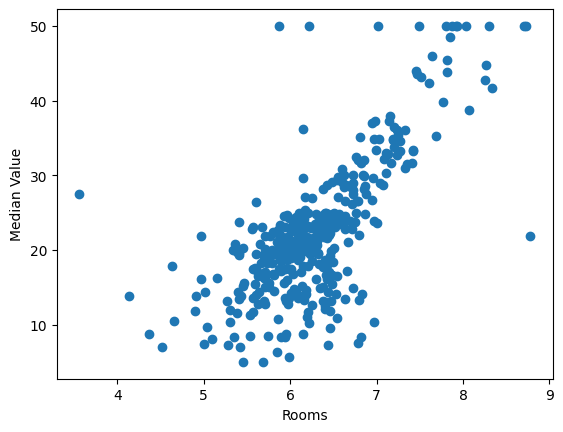

In [77]:
plt.scatter(rooms, medv)
plt.xlabel('Rooms')
plt.ylabel('Median Value')

This looks more like a linear relationship. Let's try to find the line of best fit.

$$y=mx + b$$

where target y is `MEDV` and feature x is `RM` columns in `housing_df`

In [94]:
housing_df[['RM', 'MEDV']]

,RM,MEDV
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
5,6.430,28.7
...,...,...
499,5.569,17.5
500,6.027,16.8
502,6.120,20.6
503,6.976,23.9


`Seaborn` has a function `regplot(x,y)` that will plot linear regression line

<Axes: xlabel='RM', ylabel='MEDV'>

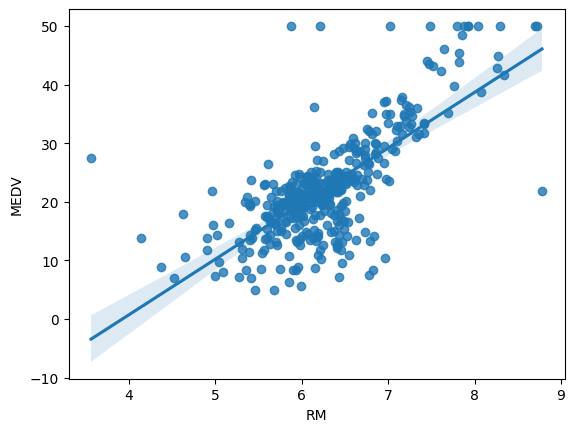

In [102]:
sns.regplot(x=housing_df['RM'], y=housing_df['MEDV'])

In [103]:
import statsmodels.api as sm

ModuleNotFoundError: No module named 'statsmodels'

In [104]:
!pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 9.0 MB/s eta 0:00:0000:0100:01
  Obtaining dependency information for scipy!=1.9.2,>=1.4 from https://files.pythonhosted.org/packages/c7/09/c07278f3c75018f80288032b09acd76aa4c2056cdb7fa9b0a145bac6b06b/scipy-1.11.1-cp311-cp311-macosx_10_9_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.0/37.0 MB 32.7 MB/s eta 0:00:0000:0100:01


In [148]:
import statsmodels.api as sm

In [150]:
housing_df['RM']

0      6.575
1      6.421
2      7.185
3      6.998
5      6.430
       ...  
499    5.569
500    6.027
502    6.120
503    6.976
504    6.794
Name: RM, Length: 394, dtype: float64

In [109]:
sm.add_constant?

Signature: sm.add_constant(data, prepend=True, has_constant='skip')
Docstring:
Add a column of ones to an array.

Parameters
----------
data : array_like
    A column-ordered design matrix.
prepend : bool
    If true, the constant is in the first column.  Else the constant is
    appended (last column).
has_constant : str {'raise', 'add', 'skip'}
    Behavior if ``data`` already has a constant. The default will return
    data without adding another constant. If 'raise', will raise an
    error if any column has a constant value. Using 'add' will add a
    column of 1s if a constant column is present.

Returns
-------
array_like
    The original values with a constant (column of ones) as the first or
    last column. Returned value type depends on input type.

Notes
-----
When the input is a pandas Series or DataFrame, the added column's name
is 'const'.
File:      ~/.pyenv/versions/3.11.4/envs/2521_env/lib/python3.11/site-packages/statsmodels/tools/tools.py
Type:      function

In [151]:
X=sm.add_constant(housing_df['RM'])
X

,const,RM
0,1.0,6.575
1,1.0,6.421
2,1.0,7.185
3,1.0,6.998
5,1.0,6.430
...,...,...
499,1.0,5.569
500,1.0,6.027
502,1.0,6.120
503,1.0,6.976


### Ordinary least squares (OLS)

Goes back to 18th century. In stats it is customary to use $\beta_0, \beta_1$ for the coefficients in sta

$$ y \sim \beta_0 + \beta_1x$$

$$ y \sim X\beta$$


In [112]:
model=sm.OLS(housing_df['MEDV'], X)

In [152]:
model.fit?

Signature:
model.fit(
    method: "Literal['pinv', 'qr']" = 'pinv',
    cov_type: "Literal['nonrobust', 'fixed scale', 'HC0', 'HC1', 'HC2', 'HC3', 'HAC', 'hac-panel', 'hac-groupsum', 'cluster']" = 'nonrobust',
    cov_kwds=None,
    use_t: 'bool | None' = None,
    **kwargs,
)
Docstring:
Full fit of the model.

The results include an estimate of covariance matrix, (whitened)
residuals and an estimate of scale.

Parameters
----------
method : str, optional
    Can be "pinv", "qr".  "pinv" uses the Moore-Penrose pseudoinverse
    to solve the least squares problem. "qr" uses the QR
    factorization.
cov_type : str, optional
    See `regression.linear_model.RegressionResults` for a description
    of the available covariance estimators.
cov_kwds : list or None, optional
    See `linear_model.RegressionResults.get_robustcov_results` for a
    description required keywords for alternative covariance
    estimators.
use_t : bool, optional
    Flag indicating to use the Student's t distribut

In [125]:
est=model.fit()

In [153]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     431.7
Date:                Mon, 07 Aug 2023   Prob (F-statistic):           3.44e-65
Time:                        17:45:36   Log-Likelihood:                -1284.2
No. Observations:                 394   AIC:                             2572.
Df Residuals:                     392   BIC:                             2580.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -37.1944      2.884    -12.897      0.000     -42.864     -31.525
RM             9.4831      0.456     20.778      0.000       8.586      10.380
==============================================================================
Omnibus:                       55.979   Durbin-Watson:                   0.852
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.623
Skew:                           0.397   Prob(JB):                     3.23e-71
Kurtosis:                       7.375   Cond. No.                         58.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the above table,

$\beta_0=-37.19$

$\beta_1=9.48$

and 

$$y \sim -37.19 + 9.48 x$$ 

is line of best fit.

In [129]:
y=housing_df['MEDV']
y

0      24.0
1      21.6
2      34.7
3      33.4
5      28.7
       ... 
499    17.5
500    16.8
502    20.6
503    23.9
504    22.0
Name: MEDV, Length: 394, dtype: float64

In [128]:
X.to_numpy()

array([[1.   , 6.575],
       [1.   , 6.421],
       [1.   , 7.185],
       [1.   , 6.998],
       [1.   , 6.43 ],
       [1.   , 6.172],
       [1.   , 5.631],
       [1.   , 6.377],
       [1.   , 6.009],
       [1.   , 5.889],
       [1.   , 5.949],
       [1.   , 5.834],
       [1.   , 5.935],
       [1.   , 5.99 ],
       [1.   , 5.456],
       [1.   , 5.727],
       [1.   , 5.57 ],
       [1.   , 5.965],
       [1.   , 6.142],
       [1.   , 5.813],
       [1.   , 5.924],
       [1.   , 5.599],
       [1.   , 5.813],
       [1.   , 6.047],
       [1.   , 6.495],
       [1.   , 6.674],
       [1.   , 5.713],
       [1.   , 6.072],
       [1.   , 5.95 ],
       [1.   , 5.701],
       [1.   , 6.096],
       [1.   , 5.85 ],
       [1.   , 5.966],
       [1.   , 6.595],
       [1.   , 7.024],
       [1.   , 6.77 ],
       [1.   , 6.169],
       [1.   , 6.069],
       [1.   , 5.682],
       [1.   , 5.786],
       [1.   , 5.399],
       [1.   , 5.602],
       [1.   , 5.963],
       [1. 